In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data=pd.read_csv(r"C:\Users\Lenovo\Desktop\Python\Datasets\water_potability.csv")
data

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0
...,...,...,...,...,...,...,...,...,...,...
3271,4.668102,193.681735,47580.991603,7.166639,359.948574,526.424171,13.894419,66.687695,4.435821,1
3272,7.808856,193.553212,17329.802160,8.061362,NaN,392.449580,19.903225,NaN,2.798243,1
3273,9.419510,175.762646,33155.578218,7.350233,NaN,432.044783,11.039070,69.845400,3.298875,1
3274,5.126763,230.603758,11983.869376,6.303357,NaN,402.883113,11.168946,77.488213,4.708658,1


# Exploratory Data Analysis

In [3]:
data.describe()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,2785.000000,3276.000000,3276.000000,3276.000000,2495.000000,3276.000000,3276.000000,3114.000000,3276.000000,3276.000000
mean,7.080795,196.369496,22014.092526,7.122277,333.775777,426.205111,14.284970,66.396293,3.966786,0.390110
std,1.594320,32.879761,8768.570828,1.583085,41.416840,80.824064,3.308162,16.175008,0.780382,0.487849
min,0.000000,47.432000,320.942611,0.352000,129.000000,181.483754,2.200000,0.738000,1.450000,0.000000
25%,6.093092,176.850538,15666.690297,6.127421,307.699498,365.734414,12.065801,55.844536,3.439711,0.000000
50%,7.036752,196.967627,20927.833607,7.130299,333.073546,421.884968,14.218338,66.622485,3.955028,0.000000
75%,8.062066,216.667456,27332.762127,8.114887,359.950170,481.792304,16.557652,77.337473,4.500320,1.000000
max,14.000000,323.124000,61227.196008,13.127000,481.030642,753.342620,28.300000,124.000000,6.739000,1.000000


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


In [5]:
data.isnull().sum()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

# Feature Engineering

### Fill the null values with their mean to avoid the data loss.

In [6]:
a=data['Sulfate'].mean()
b=data['ph'].mean()
c=data['Trihalomethanes'].mean()

In [7]:
data['Sulfate'].fillna(a,inplace=True)
data['ph'].fillna(b,inplace=True)
data['Trihalomethanes'].fillna(c,inplace=True)

In [8]:
data

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,7.080795,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,333.775777,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,333.775777,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0
...,...,...,...,...,...,...,...,...,...,...
3271,4.668102,193.681735,47580.991603,7.166639,359.948574,526.424171,13.894419,66.687695,4.435821,1
3272,7.808856,193.553212,17329.802160,8.061362,333.775777,392.449580,19.903225,66.396293,2.798243,1
3273,9.419510,175.762646,33155.578218,7.350233,333.775777,432.044783,11.039070,69.845400,3.298875,1
3274,5.126763,230.603758,11983.869376,6.303357,333.775777,402.883113,11.168946,77.488213,4.708658,1


# Outlier detection

In [9]:
q1=data.quantile(0.25)
q3=data.quantile(0.75)
IQR=q3-q1
print(q1)
print(q3)
print(IQR)

ph                     6.277673
Hardness             176.850538
Solids             15666.690297
Chloramines            6.127421
Sulfate              317.094638
Conductivity         365.734414
Organic_carbon        12.065801
Trihalomethanes       56.647656
Turbidity              3.439711
Potability             0.000000
Name: 0.25, dtype: float64
ph                     7.870050
Hardness             216.667456
Solids             27332.762127
Chloramines            8.114887
Sulfate              350.385756
Conductivity         481.792304
Organic_carbon        16.557652
Trihalomethanes       76.666609
Turbidity              4.500320
Potability             1.000000
Name: 0.75, dtype: float64
ph                     1.592377
Hardness              39.816918
Solids             11666.071830
Chloramines            1.987466
Sulfate               33.291119
Conductivity         116.057890
Organic_carbon         4.491850
Trihalomethanes       20.018954
Turbidity              1.060609
Potability        

In [10]:
low=IQR-(1.5*q1)
high=IQR+(1.5*q3)

In [11]:
d=data["ph"]

In [12]:
d=data["ph"]
outliers=data[((data<(q1-(1.5*IQR)))|(data>(q3+(1.5*IQR))))]
outliers

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,3.71608,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
3271,NaN,NaN,47580.991603,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3272,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3273,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3274,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Data Visualisation

In [10]:
corr=data.corr()
corr

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
ph,1.000000,0.075833,-0.081884,-0.031811,0.014403,0.017192,0.040061,0.002994,-0.036222,-0.003287
Hardness,0.075833,1.000000,-0.046899,-0.030054,-0.092766,-0.023915,0.003610,-0.012690,-0.014449,-0.013837
Solids,-0.081884,-0.046899,1.000000,-0.070148,-0.149840,0.013831,0.010242,-0.008875,0.019546,0.033743
Chloramines,-0.031811,-0.030054,-0.070148,1.000000,0.023791,-0.020486,-0.012653,0.016627,0.002363,0.023779
Sulfate,0.014403,-0.092766,-0.149840,0.023791,1.000000,-0.014059,0.026909,-0.025605,-0.009790,-0.020619
Conductivity,0.017192,-0.023915,0.013831,-0.020486,-0.014059,1.000000,0.020966,0.001255,0.005798,-0.008128
Organic_carbon,0.040061,0.003610,0.010242,-0.012653,0.026909,0.020966,1.000000,-0.012976,-0.027308,-0.030001
Trihalomethanes,0.002994,-0.012690,-0.008875,0.016627,-0.025605,0.001255,-0.012976,1.000000,-0.021502,0.006960
Turbidity,-0.036222,-0.014449,0.019546,0.002363,-0.009790,0.005798,-0.027308,-0.021502,1.000000,0.001581
Potability,-0.003287,-0.013837,0.033743,0.023779,-0.020619,-0.008128,-0.030001,0.006960,0.001581,1.000000


<AxesSubplot:>

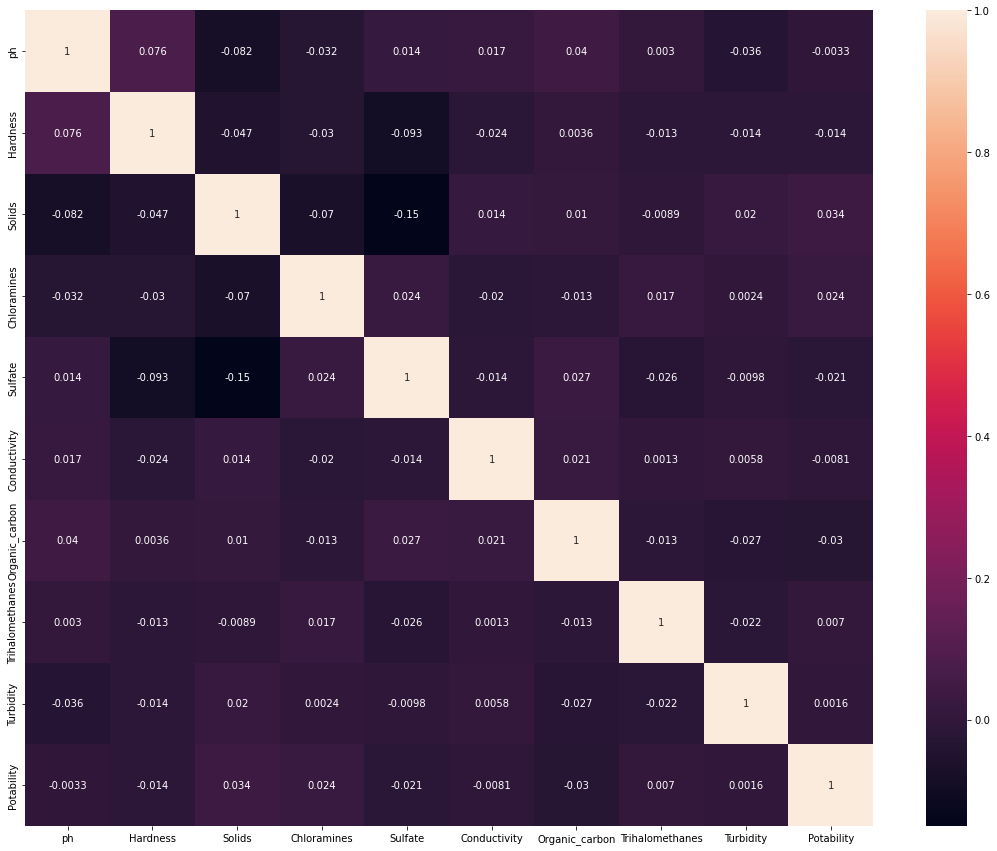

In [11]:
plt.figure(figsize=[19,15])
sns.heatmap(data.corr(),annot=True)

<AxesSubplot:>

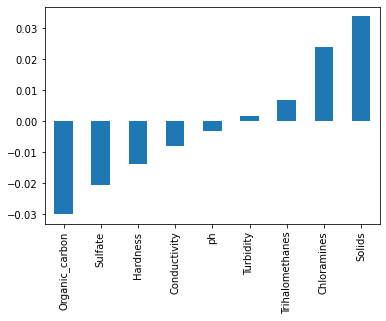

In [12]:
data.corr()["Potability"][:-1].sort_values().plot(kind="bar")

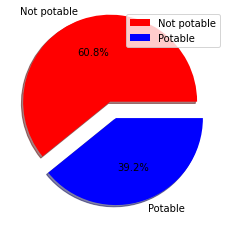

In [13]:
x=np.array([1998,1287])
label=["Not potable","Potable"]
explode=[0.2,0]
c=["red","blue"]
plt.pie(x,labels=label,explode=explode,shadow=True,colors=c,autopct="%1.1f%%")
plt.legend()
plt.show()

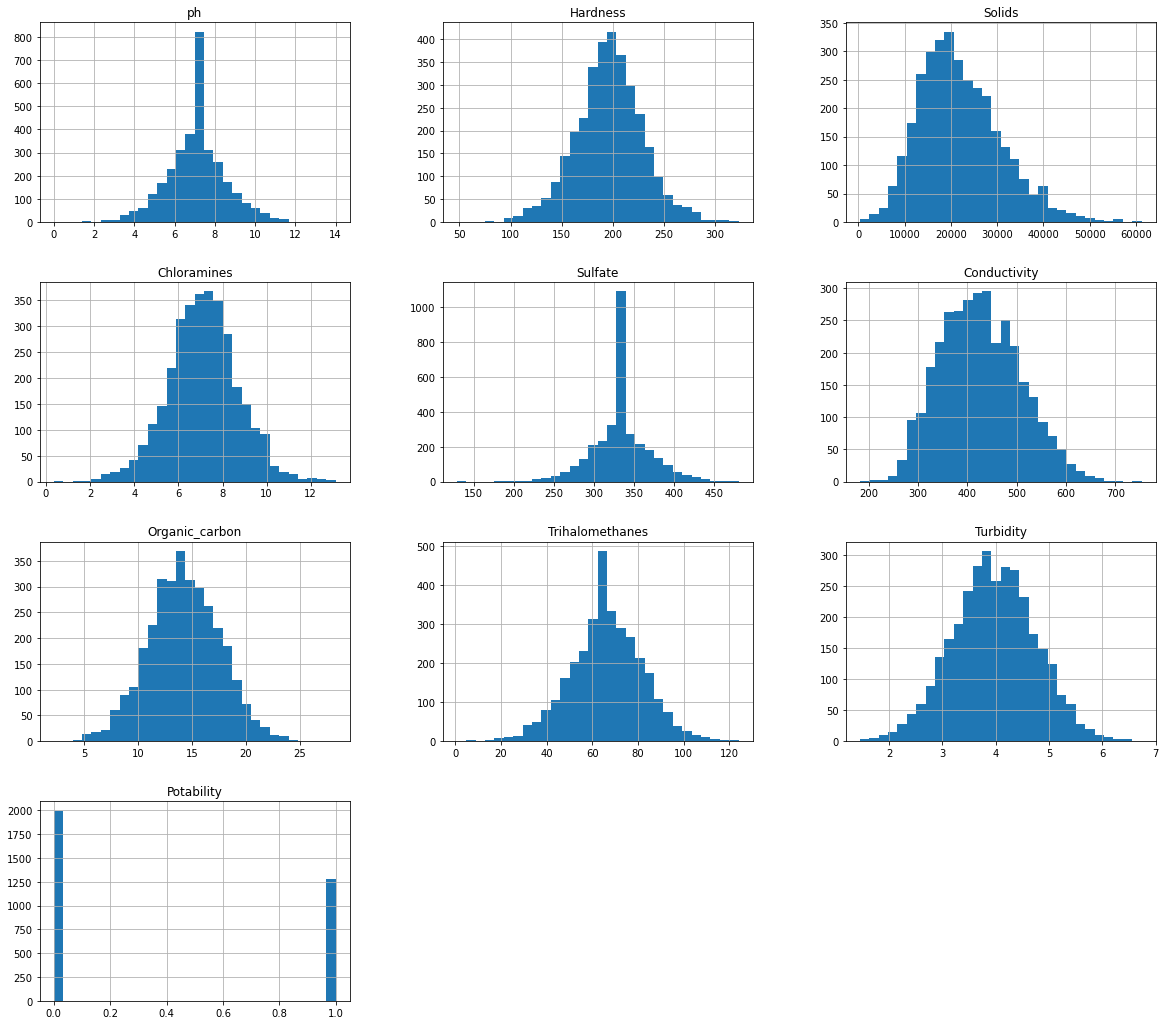

In [14]:
data.hist(bins=30,figsize=[20,18])
plt.show()

### Here most of the varibles are normally distributed but some shows skewness, so here is need of feature scaling with normalisation

# Data Slicing

In [23]:
x=data.iloc[:,:-1].values
y=data.iloc[:,-1].values

# Data Imbalancing

In [24]:
from collections import Counter
print(Counter(y))

Counter({0: 1998, 1: 1278})


In [25]:
data["Potability"].unique()

array([0, 1], dtype=int64)

In [26]:
from imblearn.over_sampling import RandomOverSampler

In [27]:
s=RandomOverSampler()
x_data,y_data=s.fit_resample(x,y)

In [28]:
print(Counter(y_data))

Counter({0: 1998, 1: 1998})


## Spliting Training & Testing Data

In [29]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x_data,y_data,test_size=0.3,random_state=99)

## Analysis By using SVM

In [30]:
from sklearn.svm import SVC
s1=SVC(random_state=187)
s1.fit(x_train,y_train)

SVC(random_state=187)

In [31]:
pred2=s1.predict(x_test)
pred2

array([0, 1, 0, ..., 0, 0, 0], dtype=int64)

In [32]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [33]:
ac2=accuracy_score(y_test,pred2)*100
print("Accuracy By using SVM Classifier: ",ac2)

Accuracy By using SVM Classifier:  52.460383653044204


In [34]:
cm2=confusion_matrix(y_test,pred2)
cm2

array([[459, 137],
       [433, 170]], dtype=int64)

## Analysis by using Random Forest

In [35]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
rf.fit(x_train,y_train)

RandomForestClassifier()

In [36]:
pred3=rf.predict(x_test)
pred3

array([0, 1, 1, ..., 1, 1, 1], dtype=int64)

In [37]:
ac3=accuracy_score(y_test,pred3)*100
print("Accuracy By using Random Forest Classifier: ",ac3)

Accuracy By using Random Forest Classifier:  74.56213511259384


In [38]:
cm3=confusion_matrix(y_test,pred3)
cm3

array([[461, 135],
       [170, 433]], dtype=int64)

## Analysis by using Decision tree

In [39]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier(criterion="entropy",random_state=139)
dt.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', random_state=139)

In [40]:
pred4=dt.predict(x_test)
pred4

array([0, 1, 1, ..., 1, 1, 1], dtype=int64)

In [41]:
ac4=accuracy_score(y_test,pred4)*100
print("Accuracy by using decision tree :",ac4)

Accuracy by using decision tree : 68.80733944954129


In [42]:
cm2=confusion_matrix(y_test,pred2)
cm3=confusion_matrix(y_test,pred3)
cm4=confusion_matrix(y_test,pred4)

In [43]:
print("Confusion matrix of svm :",cm2)
print("Confusion matrix of random forest :",cm3)
print("Confusion matrix of decision tree :",cm4)

Confusion matrix of svm : [[459 137]
 [433 170]]
Confusion matrix of random forest : [[461 135]
 [170 433]]
Confusion matrix of decision tree : [[386 210]
 [164 439]]


# Result:-

In [44]:
print("Accuracy By using  SVM Classifier: ",ac2)
print("Accuracy By using Random Forest Classifier: ",ac3)
print("Accuracy by using decision tree :",ac4)

Accuracy By using  SVM Classifier:  52.460383653044204
Accuracy By using Random Forest Classifier:  74.56213511259384
Accuracy by using decision tree : 68.80733944954129


# Feature Scaling - Normalisation

In [45]:
from sklearn.preprocessing import RobustScaler

In [46]:
r1=RobustScaler()

In [47]:
x_data1=r1.fit_transform(x_data)
y_data1=y_data

## Data prediction after Normalisation

In [48]:
x_train1,x_test1,y_train1,y_test1=train_test_split(x_data1,y_data1,test_size=0.3,random_state=99)

## SVM after feature scaling

In [49]:
svm1=SVC(random_state=157)
svm1.fit(x_train1,y_train1)
svm_pred=svm1.predict(x_test1)
svm_acc=accuracy_score(svm_pred,y_test1)*100
print("Accuracy score of Support Vector Machine: ",svm_acc)
CM=confusion_matrix(svm_pred,y_test1)
print("Confusion_Matrix of SVM: ",CM)

Accuracy score of Support Vector Machine:  65.38782318598832
Confusion_Matrix of SVM:  [[430 249]
 [166 354]]


## Random Forest Classifier after feature scaling 

In [50]:
rfc=RandomForestClassifier()
rfc.fit(x_train1,y_train1)
rfc_pred=rfc.predict(x_test1)
rfc_acc=accuracy_score(y_test1,rfc_pred)*100
print("Accuracy score of random forest classifier: ",rfc_acc)
CM1=confusion_matrix(rfc_pred,y_test1)
print("confusion matrix of random forest: ",CM1)

Accuracy score of random forest classifier:  74.31192660550458
confusion matrix of random forest:  [[456 168]
 [140 435]]


## Decision Tree after feature scaling 

In [51]:
dt=DecisionTreeClassifier()
dt.fit(x_train1,y_train1)
dt_pred=dt.predict(x_test1)
dt_acc=accuracy_score(y_test1,dt_pred)*100
print("Accuracy Score of decision tree: ",dt_acc)
CM2=confusion_matrix(dt_pred,y_test1)
CM2

Accuracy Score of decision tree:  68.80733944954129


array([[381, 159],
       [215, 444]], dtype=int64)

# cross Validation Technique

In [52]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict

In [53]:
from sklearn.model_selection import StratifiedKFold
skf=StratifiedKFold(n_splits=5,random_state=111,shuffle=True)
skf.get_n_splits(x_data1,y_data1)

5

## SVM with cross validation

In [54]:
for train_data,test_data in skf.split(x_data1,y_data1):
    x_train,x_test=x_data1[train_data],x_data1[test_data]
    y_train,y_test=y_data1[train_data],y_data1[test_data]
    
    scores=cross_val_score(svm1,x_train,y_train,cv=skf)
    y_pred=cross_val_predict(svm1,x_test,y_test)
    
    print("Checking y_test Balancing.",Counter(y_test))
    print(y_pred)
    print(scores)
    print(np.mean(scores)*100)

Checking y_test Balancing. Counter({0: 400, 1: 400})
[1 0 1 1 1 0 0 0 0 1 0 1 1 0 1 0 0 0 0 1 1 0 0 1 0 1 1 0 0 1 0 0 1 1 0 0 0
 0 1 1 1 1 0 0 1 0 1 1 0 0 0 1 1 0 0 0 0 1 0 1 0 1 0 1 1 1 0 0 0 0 0 0 0 0
 1 0 0 1 0 0 0 0 0 0 0 1 1 0 0 1 1 0 0 0 0 0 0 0 0 0 0 1 1 0 1 1 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 1 0 1 0 1 0 1 0 0 1 0 0 0 0 0 0 1 0 1 1 0 0 0 0 0 0 1
 1 1 0 1 0 0 0 0 1 0 0 1 0 0 0 0 0 0 1 0 0 1 0 0 0 1 0 0 0 1 0 0 1 0 0 0 1
 1 1 0 0 1 1 0 1 1 1 0 1 0 0 0 1 1 0 0 1 1 1 1 1 1 1 0 0 0 0 0 1 0 1 0 0 1
 1 0 1 0 0 0 0 1 0 0 0 0 0 1 0 1 0 0 0 1 0 0 1 1 0 0 0 1 1 1 1 0 1 1 0 0 0
 1 0 1 0 0 1 0 0 1 0 0 1 1 1 1 0 0 1 0 1 1 0 1 0 0 1 1 1 1 1 1 1 1 0 1 0 0
 0 0 0 1 0 0 1 1 1 1 0 1 1 1 0 1 0 0 0 1 0 0 1 0 0 1 0 1 0 1 1 1 0 0 0 1 0
 0 0 1 0 1 0 0 1 1 0 1 1 0 1 1 1 0 1 0 0 1 0 1 1 0 0 1 1 0 0 0 0 1 1 0 0 1
 0 1 1 0 0 1 0 0 0 1 1 0 1 1 1 0 1 0 1 1 0 0 1 1 0 1 0 0 0 1 0 1 0 0 1 0 1
 0 0 1 1 0 1 1 1 0 1 1 0 0 1 1 0 0 1 0 0 0 1 0 1 1 0 1 0 1 0 0 0 0 1 1 1 1
 0 1 1 0 1 1 0 0 0 1 0 0 1 0 0 1 1 1 1 0 1 0 1 

## Random Forest with Cross Validataion

In [56]:
for train_data,test_data in skf.split(x_data1,y_data1):
    x_train,x_test=x_data1[train_data],x_data1[test_data]
    y_train,y_test=y_data1[train_data],y_data1[test_data]
    
    scores=cross_val_score(rfc,x_train,y_train,cv=skf)
    y_pred1=cross_val_predict(rfc,x_test,y_test)
    
    print("Checking y_test Balancing.",Counter(y_test))
    print(y_pred1)
    print(scores)
    print(np.mean(scores)*100)

Checking y_test Balancing. Counter({0: 400, 1: 400})
[1 0 1 1 1 0 1 0 0 1 0 0 1 0 1 0 0 0 0 1 1 0 0 0 0 1 1 0 0 1 0 0 1 1 1 0 0
 0 1 0 1 1 1 0 0 1 0 1 0 0 0 1 1 1 0 0 0 1 1 1 1 1 0 0 1 1 0 1 0 0 0 1 1 0
 1 0 0 1 1 1 0 0 0 0 0 1 1 0 0 1 0 0 0 0 0 0 0 0 0 1 0 1 0 0 1 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 1 0 1 0 0 1 0 0 1 0 0 1 0 1 0 0 0 1 1 1 0 1 0 1 0 1 0 0 0
 1 1 0 0 1 1 0 0 1 1 0 0 0 0 0 0 0 0 0 1 1 0 0 0 1 1 0 0 0 0 0 0 0 1 1 0 1
 1 0 0 0 1 1 0 1 1 1 0 0 0 0 1 0 1 1 0 1 1 1 1 1 0 1 0 0 0 0 0 1 1 1 0 0 1
 1 0 1 0 0 0 0 1 0 0 0 0 0 1 0 1 0 0 0 0 0 0 1 1 0 1 0 1 1 1 0 0 1 1 0 0 0
 1 0 1 1 0 1 0 0 1 0 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 0 0 1 1 0
 0 1 0 0 1 0 1 0 1 1 0 0 1 0 0 1 0 1 0 1 0 0 1 0 0 1 0 0 0 0 0 1 0 0 0 1 0
 0 0 1 1 1 0 0 1 1 1 1 0 0 0 1 0 0 1 0 0 1 1 1 1 0 1 1 0 0 0 0 0 0 1 0 1 0
 0 1 1 0 0 1 0 0 0 1 0 1 0 0 1 0 1 1 1 1 0 0 0 0 0 1 0 0 0 0 0 1 0 0 1 1 1
 0 0 1 1 0 0 1 1 0 0 1 0 0 1 1 0 1 1 0 0 0 1 0 1 1 1 1 0 1 0 1 0 1 1 1 0 1
 0 0 1 0 0 0 0 0 0 1 0 0 1 0 0 1 1 1 0 0 1 0 1 

## Decision tree with cross validation

In [48]:
for train_data,test_data in skf.split(x_data1,y_data1):
    x_train,x_test=x_data1[train_data],x_data1[test_data]
    y_train,y_test=y_data1[train_data],y_data1[test_data]
    
    scores=cross_val_score(dt,x_train1,y_train1,cv=skf)
    y_pred2=cross_val_predict(dt,x_test1,y_test1)
    
    print("Checking y_test Balancing.",Counter(y_test1))
    print(y_pred2)
    print(scores)
    print(np.mean(scores)*100)

Checking y_test Balancing. Counter({1: 603, 0: 596})
[0 1 0 ... 1 0 0]
[0.67321429 0.67678571 0.64579606 0.64579606 0.6529517 ]
65.89087656529517
Checking y_test Balancing. Counter({1: 603, 0: 596})
[0 0 0 ... 1 0 0]
[0.65714286 0.68035714 0.65116279 0.65831843 0.6529517 ]
65.99865831842577
Checking y_test Balancing. Counter({1: 603, 0: 596})
[0 1 0 ... 1 0 0]
[0.64821429 0.68928571 0.65474061 0.65116279 0.66547406]
66.17754919499104
Checking y_test Balancing. Counter({1: 603, 0: 596})
[0 1 0 ... 1 0 0]
[0.65892857 0.66785714 0.64221825 0.65116279 0.67620751]
65.92748530539228
Checking y_test Balancing. Counter({1: 603, 0: 596})
[0 0 0 ... 1 0 0]
[0.63928571 0.69107143 0.64400716 0.65652952 0.64579606]
65.53379759775109


## Ensemble Technique

## Voting Classifier with SVM

In [49]:
from sklearn.ensemble import VotingClassifier
Maxvote=VotingClassifier(estimators=[("SVM",svm1),("RandomForest",rfc),("Decision Tree",dt)])
Maxvote
Maxvote.fit(x_train1,y_train1)
y_max=Maxvote.predict(x_test1)
y_max
Maxvote_acc=accuracy_score(y_max,y_test1)*100
Maxvote_acc

76.06338615512928

## Bagging Classifier with random Forest

In [50]:
from sklearn.ensemble import BaggingClassifier

In [51]:
bg=BaggingClassifier(base_estimator=rfc,n_estimators=5,random_state=51)
bg
bg.fit(x_train1,y_train1)
bg_pred=bg.predict(x_test1)
bg_pred
bg_acc=accuracy_score(bg_pred,y_test1)*100
print("Accuracy_score of bagging: ",bg_acc)

Accuracy_score of bagging:  74.72894078398666


# Classification Report 

In [52]:
from sklearn.metrics import classification_report

In [53]:
cr=classification_report(y_test1,bg_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.74      0.76      0.75       596
           1       0.75      0.74      0.75       603

    accuracy                           0.75      1199
   macro avg       0.75      0.75      0.75      1199
weighted avg       0.75      0.75      0.75      1199

